# Quick Messy Character Checker for Already Processed Files

### This is meant to be ran after 01 has been run and any of the following (02-04)
### Lets us overview the messy_char counts after splitting into a subset or cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from utils.constants import Paths

In [ ]:
# Load Excel file with existing analysis columns
# file_path = Paths.modified_metadata
file_path = Paths.mccray_1940s_subset
df = pd.read_excel(file_path)

print(f"Loaded {len(df)} rows")
print(f"Columns: {list(df.columns)}")

# Check for required columns
required_cols = ['messy_sequences', 'messy_count', 'has_messy', 'total_messy_chars']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"Missing required columns: {missing_cols}")
    print("Run the main tracker first to generate these columns")
    exit()

Loaded 19329 rows
Columns: ['Title', 'Creator', 'Contributors', 'Date', 'Approximate Date', 'Source', 'Subject', 'Local Subject', 'S.C. County', 'Description', 'Extent', 'Digital Collection', 'Website', 'Contributing Institution', 'Rights', 'Time Period', 'Geographic Location', 'Language', 'Digitization Specifications', 'Date Digital', 'Type', 'Format', 'Media Type', 'Identifier', 'Note', 'Digital Assistant', 'Transcript', 'OCLC number', 'Date created', 'Date modified', 'Reference URL', 'CONTENTdm number', 'CONTENTdm file name', 'CONTENTdm file path', 'Year', 'messy_sequences', 'messy_count', 'has_messy', 'total_messy_chars']



Quick Summary:
Total rows: 19329
Messy rows: 10835 (56.1%)
Clean rows: 8494 (43.9%)
Total messy sequences: 144563
Total messy characters: 397463
Max sequences in one row: 1235
Average sequences per messy row: 13.34

Messy sequence distribution:
  1 sequences: 2117 rows
  2 sequences: 1430 rows
  3 sequences: 1107 rows
  4 sequences: 859 rows
  5 sequences: 700 rows
  6 sequences: 543 rows
  7 sequences: 469 rows
  8 sequences: 328 rows
  9 sequences: 310 rows
  10 sequences: 240 rows
  11 sequences: 246 rows
  12 sequences: 197 rows
  13 sequences: 182 rows
  14 sequences: 124 rows
  15 sequences: 126 rows
  16 sequences: 116 rows
  17 sequences: 97 rows
  18 sequences: 88 rows
  19 sequences: 79 rows
  20 sequences: 74 rows
  21 sequences: 63 rows
  22 sequences: 56 rows
  23 sequences: 53 rows
  24 sequences: 44 rows
  25 sequences: 36 rows
  26 sequences: 40 rows
  27 sequences: 37 rows
  28 sequences: 43 rows
  29 sequences: 43 rows
  30 sequences: 30 rows
  31 sequences: 38 rows


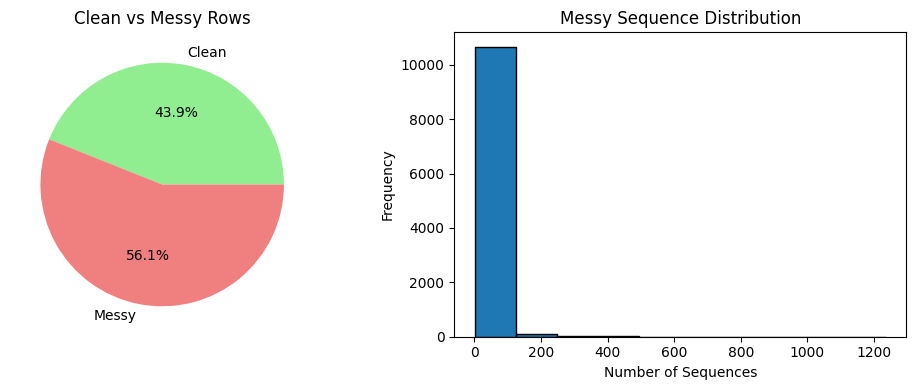


File check complete for: ../../data/changed_data/McCray+.xlsx


In [5]:
# Summary stats
total_rows = len(df)
messy_rows = df['has_messy'].sum()
clean_rows = total_rows - messy_rows

print(f"\nQuick Summary:")
print(f"Total rows: {total_rows}")
print(f"Messy rows: {messy_rows} ({messy_rows/total_rows*100:.1f}%)")
print(f"Clean rows: {clean_rows} ({clean_rows/total_rows*100:.1f}%)")
print(f"Total messy sequences: {df['messy_count'].sum()}")
print(f"Total messy characters: {df['total_messy_chars'].sum()}")

if messy_rows > 0:
    print(f"Max sequences in one row: {df['messy_count'].max()}")
    print(f"Average sequences per messy row: {df[df['has_messy']]['messy_count'].mean():.2f}")

# Show distribution of messy counts
messy_dist = df['messy_count'].value_counts().sort_index()
print(f"\nMessy sequence distribution:")
for count, freq in messy_dist.items():
    if count > 0:
        print(f"  {count} sequences: {freq} rows")

# Extract and count all messy sequences
all_sequences = []
for sequences_str in df['messy_sequences'].dropna():
    if sequences_str != '[]' and str(sequences_str) != 'nan':
        # Handle string representation of lists
        import ast
        try:
            sequences = ast.literal_eval(sequences_str) if isinstance(sequences_str, str) else sequences_str
            if isinstance(sequences, list):
                all_sequences.extend(sequences)
        except:
            pass

if all_sequences:
    sequence_counts = Counter(all_sequences)
    print(f"\nTop 10 messy sequences in this subset:")
    for seq, count in sequence_counts.most_common(10):
        print(f"  {repr(seq)}: {count} times")
else:
    print(f"\nNo messy sequences found in this subset")

# Show worst offenders
if messy_rows > 0:
    worst_rows = df.nlargest(5, 'messy_count')
    print(f"\nTop 5 rows with most messy sequences:")
    for idx, row in worst_rows.iterrows():
        print(f"  Row {idx}: {row['messy_count']} sequences, {row['total_messy_chars']} chars")

# Simple visualization
if messy_rows > 0:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Pie chart of clean vs messy
    axes[0].pie([clean_rows, messy_rows], labels=['Clean', 'Messy'], 
                autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    axes[0].set_title('Clean vs Messy Rows')
    
    # Histogram of messy counts (only for messy rows)
    messy_only = df[df['has_messy']]['messy_count']
    axes[1].hist(messy_only, bins=min(10, messy_only.max()), edgecolor='black')
    axes[1].set_title('Messy Sequence Distribution')
    axes[1].set_xlabel('Number of Sequences')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
else:
    print("No messy characters found - subset is clean!")

print(f"\nFile check complete for: {file_path}")